In [14]:
import pandas as pd
from sqlalchemy import create_engine


server = 'JERAL_BENITES'
database = 'picks'
username = 'sa'
password = 'zaperoko1'

connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)

sql_query = """
SELECT 
    match.app, couponb.name cupon, categoryb.name categoria, match.bet apuesta,
    match.day dia, match.time hora, match.rate tasa, match.status estado, teamaway.name equipoVisita, teamhome.name  equipoLocal,league.name
FROM [dbo].[match_bet] AS match
LEFT JOIN [dbo].[team_bet] AS teamaway
       ON match.id_away_team = teamaway.id
LEFT JOIN [dbo].[team_bet] AS teamhome
       ON match.id_home_team = teamhome.id
LEFT JOIN [dbo].[league_bet] AS league
       ON match.id_league = league.id
LEFT JOIN [dbo].[category_bet] AS categoryb
       ON match.id_category = categoryb.id
LEFT JOIN [dbo].[coupon_bet] AS couponb
       ON categoryb.id_coupon = couponb.id
"""

data = pd.read_sql(sql_query, engine)

data.head()

,app,cupon,categoria,apuesta,dia,hora,tasa,estado,equipoVisita,equipoLocal,name
0,ELITE TIP BET,V.I.P,50+ ODDS VIP,BESIKTAS WINS,27-09-2023,12:00,2.2,EN ESPERA,BESIKTAS,ADANA DEMIRSPOR,TURKEY 1 LEAGUE
1,MULTI TIPS,FREE,20+ ODDS,ADANA DEMIRSPOR WINS,14-02-2022,12:00,2.5,PERDIDO,BESIKTAS,ADANA DEMIRSPOR,TURKEY SUPER LEAGUE
2,MULTI TIPS,FREE,20+ ODDS,"OVER+ 2,5 GOALS",21-05-2023,11:00,1.5,GANADO,BESIKTAS,ADANA DEMIRSPOR,TURKEY SUPER LEAGUE
3,MULTI TIPS,V.I.P,50+ ODDS VIP,"OVER+ 2,5 GOALS",21-05-2023,11:00,1.5,GANADO,BESIKTAS,ADANA DEMIRSPOR,TURKEY SUPER LEAGUE
4,MULTI TIPS,V.I.P,50+ ODDS VIP,BESIKTAS WINS,27-09-2023,12:00,2.1,EN ESPERA,BESIKTAS,ADANA DEMIRSPOR,TURKEY SUPER LEAGUE


In [15]:
import matplotlib.pyplot as plt

# Contar la cantidad de registros por estado
estado_count = data['estado'].value_counts()

print(estado_count)

estado
GANADO         22710
EN ESPERA      15820
PERDIDO         2235
C/ SUSTENTO       24
Name: count, dtype: int64


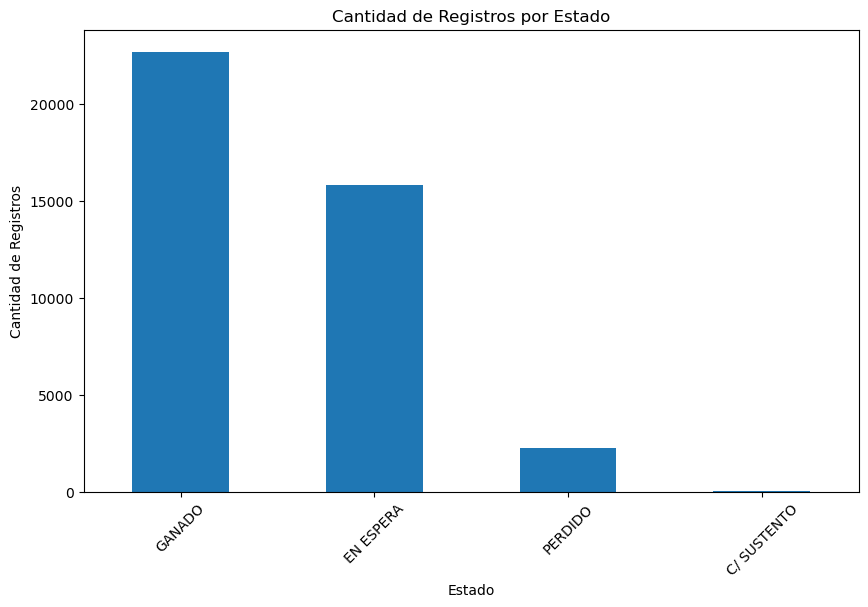

In [16]:

plt.figure(figsize=(10, 6))
estado_count.plot(kind='bar')
plt.title('Cantidad de Registros por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)
plt.show()

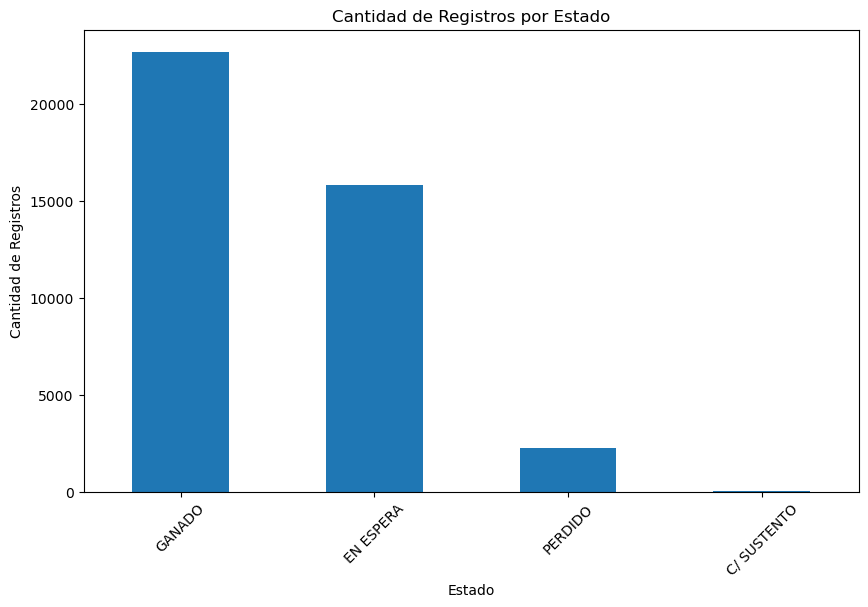

In [17]:

plt.figure(figsize=(10, 6))
estado_count.plot(kind='bar')
plt.title('Cantidad de Registros por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)
plt.show()

In [22]:
import pandas as pd
from sqlalchemy import create_engine


server = 'JERAL_BENITES'
database = 'picks'
username = 'sa'
password = 'zaperoko1'

connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)

sql_query = """
SELECT 
    match.app, couponb.name cupon, categoryb.name categoria, match.bet apuesta,
    match.day dia, match.time hora, match.rate tasa, match.status estado, teamaway.name equipoVisita, teamhome.name  equipoLocal,league.name as liga
FROM [dbo].[match_bet] AS match
LEFT JOIN [dbo].[team_bet] AS teamaway
       ON match.id_away_team = teamaway.id
LEFT JOIN [dbo].[team_bet] AS teamhome
       ON match.id_home_team = teamhome.id
LEFT JOIN [dbo].[league_bet] AS league
       ON match.id_league = league.id
LEFT JOIN [dbo].[category_bet] AS categoryb
       ON match.id_category = categoryb.id
LEFT JOIN [dbo].[coupon_bet] AS couponb
       ON categoryb.id_coupon = couponb.id
"""

data = pd.read_sql(sql_query, engine)

data.head()

,app,cupon,categoria,apuesta,dia,hora,tasa,estado,equipoVisita,equipoLocal,liga
0,MULTI TIPS,FREE,20+ ODDS,"OVER+ 2,5 GOALS",09-09-2022,13:30,1.70,EN ESPERA,AUGSBURG,BREMEN,GERMANY BUNDESLIGA
1,MULTI TIPS,V.I.P,50+ ODDS VIP,"OVER+ 2,5 GOALS",09-09-2022,13:30,1.70,EN ESPERA,AUGSBURG,BREMEN,GERMANY BUNDESLIGA
2,MULTI TIPS,FREE,20+ ODDS,"OVER+ 2,5 GOALS",11-02-2023,09:30,1.50,PERDIDO,DORTMUND,BREMEN,GERMANY BUNDESLIGA
3,MULTI TIPS,V.I.P,50+ ODDS VIP,BOTH TEAM SCORES/YES,16-04-2023,08:30,1.70,GANADO,FREIBURG,BREMEN,GERMANY BUNDESLIGA
4,MULTI TIPS,V.I.P,50+ ODDS VIP,BOTH TEAM SCORES/YES,18-09-2022,06:00,1.65,EN ESPERA,ARSENAL,BRENTFORD,ENGLAND PREMIER


In [19]:
unique_leagues = data['liga'].unique()
print(unique_leagues)

['JORDAN PREMIER LEAGUE' 'ITALY SERIE' 'FIFA WORLD CUP' ...
 'WTA WASHINGTON USA' 'PUERO RICO BSN' 'AUSTRIA REGIONAL WIEN']


In [20]:
data['liga'] = data['liga'].str.upper()

In [21]:
data.dropna(subset=['liga'], inplace=True)

In [23]:
data.count()

app             40789
cupon           40789
categoria       40789
apuesta         40789
dia             40789
hora            40789
tasa            40789
estado          40789
equipoVisita    40789
equipoLocal     40789
liga            40789
dtype: int64

In [24]:
data['liga'] = data['liga'].str.upper()

In [25]:
data['liga'] = data['liga'].replace(
    {
        'AFRCICA': 'AFRICA'
    }
)


In [30]:
data.to_csv('output.csv', index=False)


In [31]:
data.to_excel('datos_exportados.xlsx', index=False, engine='openpyxl')
